Load the data

In [1]:
import pandas as pd

file_path = "/content/drive/MyDrive/Kickstarter.xlsx"

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Now you can work with the DataFrame 'df'
print(df.head())

       id                                               name   goal  pledged  \
0   22292                          Golgotha - A Feature Film   5500   5530.0   
1   82234                     Vinca is opening a storefront!  10000  11045.0   
2   86478    The next Paul Jacobsen & The Madison Arm album!   8500  10556.0   
3  127446                 Erin Heist First Full-Length Album   5000   5816.0   
4  151612  Earth Day Heritage: A Celebration in Music and...  15000   2361.0   

        state  disable_communication country currency            deadline  \
0  successful                  False      US      USD 2017-07-09 04:59:00   
1  successful                  False      US      USD 2018-10-25 14:29:30   
2  successful                  False      US      USD 2019-05-05 16:37:46   
3  successful                  False      US      USD 2021-11-25 21:00:14   
4      failed                  False      US      USD 2021-04-15 21:22:00   

     state_changed_at  ... created_at_yr created_at_hr  

# Data preprocessing


1. Missing value (dropped them since its only 2%)

In [2]:
# Check for missing values
for column in df.columns:
    missing_count = df[column].isnull().sum()  # Count missing values in the column
    missing_percentage = (missing_count / len(df)) * 100  # Calculate percentage
    print(f"Column: {column}, Missing Values: {missing_count}, Percentage: {missing_percentage:.2f}%")

Column: id, Missing Values: 0, Percentage: 0.00%
Column: name, Missing Values: 0, Percentage: 0.00%
Column: goal, Missing Values: 0, Percentage: 0.00%
Column: pledged, Missing Values: 0, Percentage: 0.00%
Column: state, Missing Values: 0, Percentage: 0.00%
Column: disable_communication, Missing Values: 0, Percentage: 0.00%
Column: country, Missing Values: 0, Percentage: 0.00%
Column: currency, Missing Values: 0, Percentage: 0.00%
Column: deadline, Missing Values: 0, Percentage: 0.00%
Column: state_changed_at, Missing Values: 0, Percentage: 0.00%
Column: created_at, Missing Values: 0, Percentage: 0.00%
Column: launched_at, Missing Values: 0, Percentage: 0.00%
Column: staff_pick, Missing Values: 0, Percentage: 0.00%
Column: backers_count, Missing Values: 0, Percentage: 0.00%
Column: static_usd_rate, Missing Values: 0, Percentage: 0.00%
Column: usd_pledged, Missing Values: 0, Percentage: 0.00%
Column: category, Missing Values: 0, Percentage: 0.00%
Column: spotlight, Missing Values: 0, Per

In [3]:
# Drop rows with missing values since they only count for 1.83%
df = df.dropna()

print(df.head())

       id                                               name   goal  pledged  \
0   22292                          Golgotha - A Feature Film   5500   5530.0   
1   82234                     Vinca is opening a storefront!  10000  11045.0   
2   86478    The next Paul Jacobsen & The Madison Arm album!   8500  10556.0   
3  127446                 Erin Heist First Full-Length Album   5000   5816.0   
4  151612  Earth Day Heritage: A Celebration in Music and...  15000   2361.0   

        state  disable_communication country currency            deadline  \
0  successful                  False      US      USD 2017-07-09 04:59:00   
1  successful                  False      US      USD 2018-10-25 14:29:30   
2  successful                  False      US      USD 2019-05-05 16:37:46   
3  successful                  False      US      USD 2021-11-25 21:00:14   
4      failed                  False      US      USD 2021-04-15 21:22:00   

     state_changed_at  ... created_at_yr created_at_hr  

2. Check duplicates (NONE)

In [4]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


3. Check unary variable (dropped them)

In [5]:
# Detect unary variables (columns with only one unique value)
unary_vars = [col for col in df.columns if df[col].nunique() == 1]

# Print out the unary variables
print("Unary variables (constant columns):")
print(unary_vars)


Unary variables (constant columns):
['disable_communication']


4. Dropped useless vairbales

In [6]:
# List of variables to drop
useless_vars = [
    'id', 'name', 'disable_communication',#Unary variables
    'currency', 'created_at',
    'state_changed_at', 'state_changed_at_hr', 'created_at_hr',
    'state_changed_at_day', 'state_changed_at_month', 'state_changed_at_yr',
    'created_at_day', 'created_at_month', 'created_at_yr','static_usd_rate'
]

# Drop the variables
df = df.drop(columns=useless_vars)

# Check the remaining columns
print("Remaining columns after dropping unuseful variables:")
print(df.columns)
print(df.head())

Remaining columns after dropping unuseful variables:
Index(['goal', 'pledged', 'state', 'country', 'deadline', 'launched_at',
       'staff_pick', 'backers_count', 'usd_pledged', 'category', 'spotlight',
       'name_len', 'name_len_clean', 'blurb_len', 'blurb_len_clean',
       'deadline_weekday', 'state_changed_at_weekday', 'created_at_weekday',
       'launched_at_weekday', 'deadline_month', 'deadline_day', 'deadline_yr',
       'deadline_hr', 'launched_at_month', 'launched_at_day', 'launched_at_yr',
       'launched_at_hr', 'main_category', 'staff_pick.1', 'show_feature_image',
       'video'],
      dtype='object')
    goal  pledged       state country            deadline         launched_at  \
0   5500   5530.0  successful      US 2017-07-09 04:59:00 2017-06-03 16:05:54   
1  10000  11045.0  successful      US 2018-10-25 14:29:30 2018-09-25 14:29:30   
2   8500  10556.0  successful      US 2019-05-05 16:37:46 2019-04-05 16:37:46   
3   5000   5816.0  successful      US 2021-11-25

5. Create variable "Project length days"

In [7]:
# Combine the launched_at date and time into a single string
df['launched_at_str'] = df['launched_at_yr'].astype(str) + '-' + \
                        df['launched_at_month'].astype(str).str.zfill(2) + '-' + \
                        df['launched_at_day'].astype(str).str.zfill(2) + ' ' + \
                        df['launched_at_hr'].astype(str).str.zfill(2) + ':00:00'

# Convert the string to datetime for launched_at
df['launched_at'] = pd.to_datetime(df['launched_at_str'])

# Similarly, combine the deadline columns (if needed)
df['deadline_str'] = df['deadline_yr'].astype(str) + '-' + \
                      df['deadline_month'].astype(str).str.zfill(2) + '-' + \
                      df['deadline_day'].astype(str).str.zfill(2) + ' ' + \
                      df['deadline_hr'].astype(str).str.zfill(2) + ':00:00'

# Convert the string to datetime for deadline
df['deadline'] = pd.to_datetime(df['deadline_str'])

# Calculate the project length in days
df['project_length_days'] = (df['deadline'] - df['launched_at']).dt.days

# Display the result
print(df[['launched_at', 'deadline', 'project_length_days']].head())


          launched_at            deadline  project_length_days
0 2017-06-03 16:00:00 2017-07-09 04:00:00                   35
1 2018-09-25 14:00:00 2018-10-25 14:00:00                   30
2 2019-04-05 16:00:00 2019-05-05 16:00:00                   30
3 2021-10-26 20:00:00 2021-11-25 21:00:00                   30
4 2021-03-15 19:00:00 2021-04-15 21:00:00                   31


In [ ]:
# List of columns to drop
columns_to_drop = ['launched_at_yr', 'launched_at_month', 'launched_at_day', 'launched_at_hr',
                   'deadline_yr', 'deadline_month', 'deadline_day', 'deadline_hr',
                   'launched_at_str', 'deadline_str','deadline', 'launched_at']

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

# Check the remaining columns
print(df.columns)


Index(['goal', 'pledged', 'state', 'country', 'staff_pick', 'backers_count',
       'usd_pledged', 'category', 'spotlight', 'name_len', 'name_len_clean',
       'blurb_len', 'blurb_len_clean', 'deadline_weekday',
       'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday',
       'main_category', 'staff_pick.1', 'show_feature_image', 'video',
       'project_length_days'],
      dtype='object')


6. Drop unrelated Y value

In [ ]:
# Drop rows where 'state' is 'live' or 'canceled'
df = df[~df['state'].isin(['live', 'canceled'])]

# Convert 'state' column to numerical values using label encoding
df['state_encoded'] = df['state'].map({'successful': 1, 'failed': 0})  # Example for binary encoding

# Print the result
print(df[['state', 'state_encoded']].head())

# Drop the state
df = df.drop(columns=['state'])

# Verify that 'state' is removed
print(df.head())


        state  state_encoded
0  successful              1
1  successful              1
2  successful              1
3  successful              1
4      failed              0
    goal  pledged country  staff_pick  backers_count  usd_pledged  \
0   5500   5530.0      US       False             30       5530.0   
1  10000  11045.0      US       False            132      11045.0   
2   8500  10556.0      US       False            152      10556.0   
3   5000   5816.0      US       False             86       5816.0   
4  15000   2361.0      US       False             40       2361.0   

          category  spotlight  name_len  name_len_clean  ...  \
0        Thrillers       True         4               3  ...   
1          Jewelry       True         5               4  ...   
2   Country & Folk       True         8               6  ...   
3   Country & Folk       True         5               5  ...   
4  Classical Music      False        10               9  ...   

   deadline_weekday  state

<ipython-input-9-1ba087b9846f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state_encoded'] = df['state'].map({'successful': 1, 'failed': 0})  # Example for binary encoding


7. Convert categorical and binary variables

In [ ]:
# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# List of categorical variables to be converted
categorical_columns = ['country', 'staff_pick', 'category', 'spotlight', 'deadline_weekday',
                       'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday',
                       'main_category', 'staff_pick.1', 'show_feature_image', 'video']

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Detect binary categorical variables and print unique values
binary_columns = []
for col in categorical_columns:
    unique_values = df[col].nunique()  # Number of unique values in the column
    if unique_values == 2:
        binary_columns.append(col)
        print(f"Binary Column: {col}, Unique Values: {df[col].unique()}")

# Output the binary columns
print("Binary Categorical Columns:", binary_columns)


Binary Column: staff_pick, Unique Values: [0 1]
Binary Column: spotlight, Unique Values: [1 0]
Binary Column: show_feature_image, Unique Values: [0 1]
Binary Column: video, Unique Values: [1 0]
Binary Categorical Columns: ['staff_pick', 'spotlight', 'show_feature_image', 'video']


In [ ]:
# Convert binary columns to 0 and 1 explicitly (if not already)
binary_columns = ['staff_pick', 'spotlight', 'show_feature_image', 'video']

for col in binary_columns:
    df[col] = df[col].apply(lambda x: 1 if x in [1, '1', 'True', 'true', 'Yes', 'yes'] else 0)

# Check the result
print(df[binary_columns].head())


   staff_pick  spotlight  show_feature_image  video
0           0          1                   0      1
1           0          1                   0      1
2           0          1                   0      1
3           0          1                   0      1
4           0          0                   0      1


In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()


# Convert binary columns to numeric (already binary but we ensure consistency)
for col in binary_columns:
    df[col] = df[col].apply(lambda x: 1 if x in [1, '1', 'True', 'true', 'Yes', 'yes'] else 0)

# Apply One-Hot Encoding for non-binary categorical variables
non_binary_columns = [col for col in categorical_columns if col not in binary_columns]
df = pd.get_dummies(df, columns=non_binary_columns, drop_first=True)

# Check the result
print(df.head())


    goal  pledged  staff_pick  backers_count  usd_pledged  spotlight  \
0   5500   5530.0           0             30       5530.0          1   
1  10000  11045.0           0            132      11045.0          1   
2   8500  10556.0           0            152      10556.0          1   
3   5000   5816.0           0             86       5816.0          1   
4  15000   2361.0           0             40       2361.0          0   

   name_len  name_len_clean  blurb_len  blurb_len_clean  ...  main_category_5  \
0         4               3         22               20  ...            False   
1         5               4         25               23  ...             True   
2         8               6         16               13  ...            False   
3         5               5         15               14  ...            False   
4        10               9         19               18  ...            False   

   main_category_6  main_category_7  main_category_8  main_category_9  \
0      

8. Check for correlation

Highly Correlated Variables (Correlation > 0.9):
('spotlight', 'state_encoded')
('name_len', 'name_len_clean')
('name_len_clean', 'name_len')
('blurb_len', 'blurb_len_clean')
('blurb_len_clean', 'blurb_len')
('state_encoded', 'spotlight')


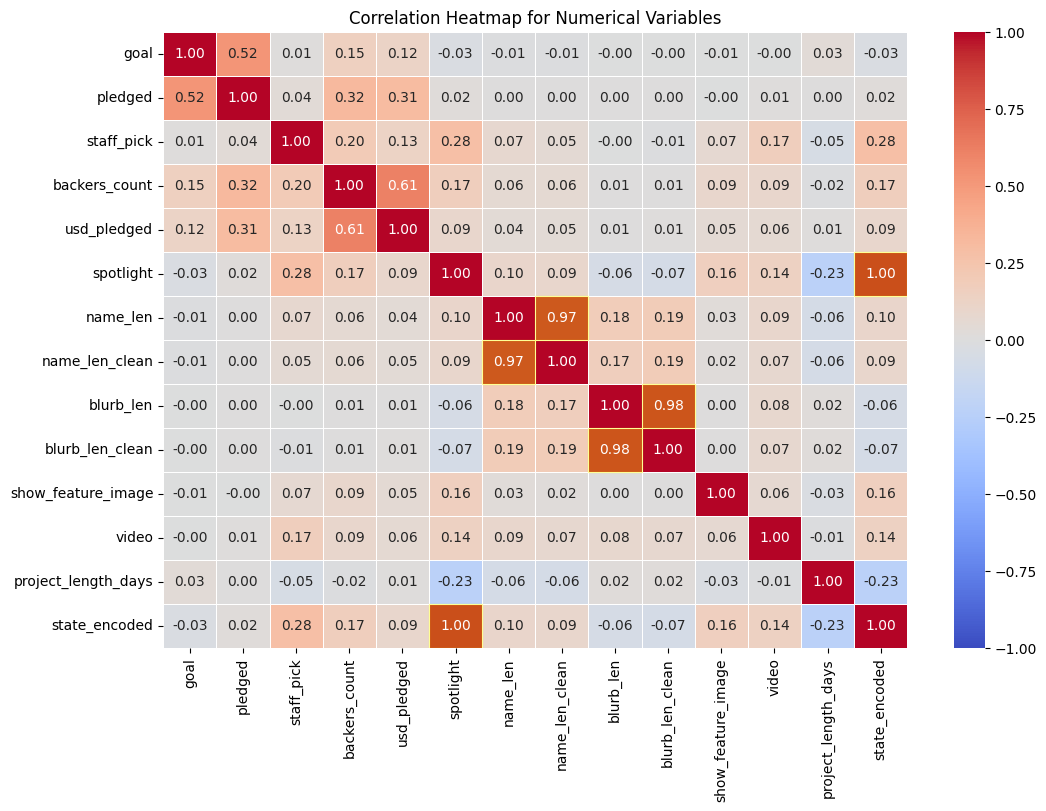

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical variables from the DataFrame
numerical_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numerical variables
corr_matrix = numerical_df.corr()

# Set a threshold for high correlation (e.g., > 0.9)
threshold = 0.9

# Find the pairs of features with correlation higher than the threshold
highly_correlated = []

for col in corr_matrix.columns:
    # Get the columns that are highly correlated with 'col' but ignore the diagonal
    high_corr_pairs = corr_matrix.index[corr_matrix[col] > threshold].tolist()
    high_corr_pairs.remove(col)  # Remove the column itself
    for pair in high_corr_pairs:
        highly_correlated.append((col, pair))

# Print the highly correlated pairs
print("Highly Correlated Variables (Correlation > 0.9):")
for pair in highly_correlated:
    print(pair)

# Plot the heatmap for only numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

# Highlight the highly correlated variables by adding a rectangle or annotating them
for pair in highly_correlated:
    plt.gca().add_patch(plt.Rectangle(
        (corr_matrix.columns.get_loc(pair[0]), corr_matrix.columns.get_loc(pair[1])),  # location
        1, 1,  # size of the patch
        color='yellow', alpha=0.3  # color and transparency of the highlighted patch
    ))

plt.title('Correlation Heatmap for Numerical Variables')
plt.show()


In [ ]:
# Drop the redundant columns
df.drop(columns=['name_len', 'blurb_len','spotlight'], inplace=True)

# Verify that the columns are dropped
print(df.columns)


Index(['goal', 'pledged', 'staff_pick', 'backers_count', 'usd_pledged',
       'name_len_clean', 'blurb_len_clean', 'show_feature_image', 'video',
       'project_length_days',
       ...
       'main_category_5', 'main_category_6', 'main_category_7',
       'main_category_8', 'main_category_9', 'main_category_10',
       'main_category_11', 'main_category_12', 'main_category_13',
       'main_category_14'],
      dtype='object', length=298)


Highly Correlated Variables (Correlation > 0.9):


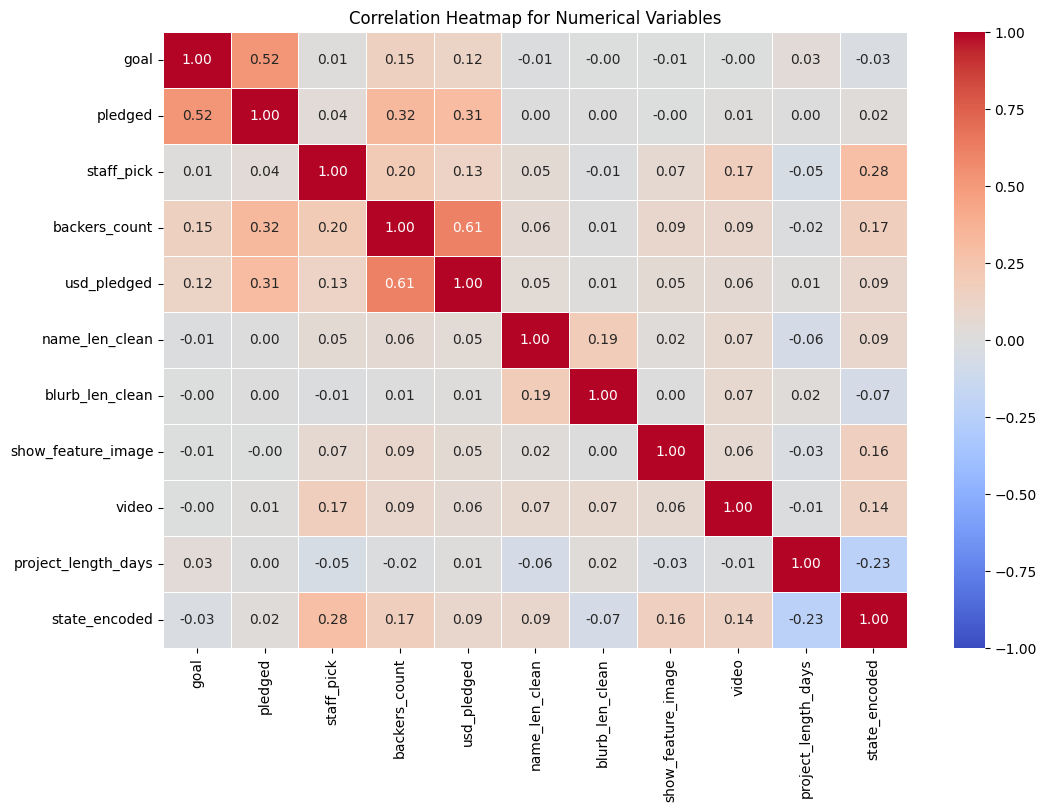

In [ ]:
# Select only numerical variables from the DataFrame
numerical_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numerical variables
corr_matrix = numerical_df.corr()

# Set a threshold for high correlation (e.g., > 0.9)
threshold = 0.9

# Find the pairs of features with correlation higher than the threshold
highly_correlated = []

for col in corr_matrix.columns:
    # Get the columns that are highly correlated with 'col' but ignore the diagonal
    high_corr_pairs = corr_matrix.index[corr_matrix[col] > threshold].tolist()
    high_corr_pairs.remove(col)  # Remove the column itself
    for pair in high_corr_pairs:
        highly_correlated.append((col, pair))

# Print the highly correlated pairs
print("Highly Correlated Variables (Correlation > 0.9):")
for pair in highly_correlated:
    print(pair)

# Plot the heatmap for only numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

# Highlight the highly correlated variables by adding a rectangle or annotating them
for pair in highly_correlated:
    plt.gca().add_patch(plt.Rectangle(
        (corr_matrix.columns.get_loc(pair[0]), corr_matrix.columns.get_loc(pair[1])),  # location
        1, 1,  # size of the patch
        color='yellow', alpha=0.3  # color and transparency of the highlighted patch
    ))

plt.title('Correlation Heatmap for Numerical Variables')
plt.show()


In [ ]:
# List categorical columns (those with type 'object')
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)


Categorical columns: Index([], dtype='object')


9. Split the dataset to 3/7 and standardliz data

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop(columns=['state_encoded'])  # Drop the target column
y = df['state_encoded']  # Target column (encoded state)

# --- Outlier Detection with Isolation Forest ---
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit Isolation Forest on the entire dataset and predict outliers
outlier_predictions = iso_forest.fit_predict(X)

# Filter out outliers (keep only rows where predictions == 1)
X_clean = X[outlier_predictions == 1]
y_clean = y[outlier_predictions == 1]

print(f"Original dataset shape: {X.shape}")
print(f"Dataset shape after outlier removal: {X_clean.shape}")

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=42)

# --- Standardizing the Data ---
scaler = StandardScaler()

# Fit the scaler on training data, and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape after scaling: {X_train_scaled.shape}")
print(f"Testing set shape after scaling: {X_test_scaled.shape}")


Original dataset shape: (14185, 297)
Dataset shape after outlier removal: (14043, 297)
Training set shape after scaling: (9830, 297)
Testing set shape after scaling: (4213, 297)


# Feature Selections

feature selection:
1.	Filter methods
2.	Wrapper methods
3.	Embedded methods (LASSO)
4.	Embedded methods (RF)

Why All Features Might Perform Better
Irrelevant Features Are Not Harming Much:

Some models (like Logistic Regression) are robust to irrelevant features if their coefficients are naturally driven close to zero or if their impact on performance is minimal.
Feature Interactions:

Removing features might inadvertently remove interactions or patterns that the model was leveraging. For example, even if a feature is weak on its own, it could contribute strongly when combined with others.
Overfitting is Less of an Issue:

If your dataset is large relative to the number of features, overfitting (a common reason for feature selection) might not be a major concern, so including all features can sometimes lead to better results.
Feature Scaling Issues:

If feature scaling was not properly handled (e.g., some methods like Logistic Regression or clustering rely on scaled data), it could lead to biased results for feature-selected subsets.
Multicollinearity:

While multicollinearity can hurt interpretability in linear models, it doesn't always harm predictive accuracy.

In [ ]:
# Assuming `df_columns` contains all the column names in the dataframe
df_columns = df.columns.tolist()

# Predefined pre-launch and post-launch column lists
pre_launch_col = [
    "state", "id", "name", "goal", "disable_communication", "country", "currency",
    "deadline", "static_usd_rate", "category", "name_len",
    "name_len_clean", "blurb_len", "blurb_len_clean", "deadline_weekday",
    "created_at", "launched_at", "created_at_weekday", "launched_at_weekday",
    "deadline_month", "deadline_day", "deadline_yr", "deadline_hr",
    "created_at_month", "created_at_day", "created_at_yr", "created_at_hr",
    "launched_at_month", "launched_at_day", "launched_at_yr", "launched_at_hr",
    "main_category", "show_feature_image", "video"
]

post_launch_col = [
    "pledged", "state_changed_at", "backers_count", "usd_pledged",
    "spotlight", "state_changed_at_weekday", "state_changed_at_month",
    "state_changed_at_day", "state_changed_at_yr", "state_changed_at_hr", "staff_pick", "staff_pick.1"
]

# Define patterns for identifying one-hot encoded columns (e.g., main_category_X, deadline_weekday_X, etc.)
pre_launch_patterns = ['main_category_', 'deadline_weekday_', 'created_at_weekday_', 'category_']

# Start with explicitly defined pre-launch columns that exist in the dataframe
pre_launch_col_cleaned = [col for col in pre_launch_col if col in df_columns]

# Add one-hot encoded pre-launch columns based on patterns
for col in df_columns:
    if any(pattern in col for pattern in pre_launch_patterns):
        pre_launch_col_cleaned.append(col)

# Remove duplicates
pre_launch_col_cleaned = list(set(pre_launch_col_cleaned))

# Filter pre-launch columns from the cleaned dataset (X_clean)
pre_launch_col_cleaned = [col for col in pre_launch_col_cleaned if col in X_clean.columns]
X_prelaunch = X_clean[pre_launch_col_cleaned]

# --- Split the pre-launch dataset ---
X_train_prelaunch, X_test_prelaunch, y_train_prelaunch, y_test_prelaunch = train_test_split(
    X_prelaunch, y_clean, test_size=0.3, random_state=42
)

# --- Standardize the pre-launch data ---
scaler_prelaunch = StandardScaler()

X_train_scaled_prelaunch = scaler_prelaunch.fit_transform(X_train_prelaunch)
X_test_scaled_prelaunch = scaler_prelaunch.transform(X_test_prelaunch)

# Print results to verify
print(f"Filtered pre-launch feature columns: {X_prelaunch.columns.tolist()}")
print(f"Pre-launch training set shape: {X_train_scaled_prelaunch.shape}")
print(f"Pre-launch testing set shape: {X_test_scaled_prelaunch.shape}")



Filtered pre-launch feature columns: ['category_10', 'category_123', 'category_36', 'category_11', 'category_80', 'category_8', 'category_60', 'category_116', 'category_15', 'category_12', 'category_44', 'category_70', 'category_136', 'category_67', 'category_41', 'category_17', 'category_32', 'category_93', 'category_1', 'category_130', 'category_13', 'category_88', 'category_95', 'category_52', 'category_2', 'category_37', 'blurb_len_clean', 'category_135', 'category_68', 'category_108', 'category_83', 'category_53', 'category_58', 'category_34', 'category_132', 'video', 'category_38', 'category_100', 'show_feature_image', 'category_18', 'main_category_11', 'category_94', 'category_104', 'category_106', 'category_33', 'main_category_14', 'category_69', 'category_97', 'deadline_weekday_2', 'deadline_weekday_1', 'category_96', 'category_66', 'category_117', 'category_62', 'category_112', 'deadline_weekday_3', 'category_111', 'category_20', 'category_55', 'category_91', 'category_42', '

In [ ]:
k=20
from sklearn.feature_selection import SelectKBest, f_classif

# --- Feature Selection with SelectKBest (ANOVA F-statistic) ---
# Apply SelectKBest with ANOVA F-statistic to select the top k features
selector = SelectKBest(f_classif, k='all')  # 'all' to evaluate all features
selector.fit(X_train_scaled_prelaunch, y_train_prelaunch)

# Get the feature scores
filter_scores_prelaunch = pd.DataFrame({
    'Feature': X_train_prelaunch.columns,  # Original feature names (before scaling)
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

# Display scores
print("Feature scores (Pre-launch data):")
print(filter_scores_prelaunch)

# Extract top features
filter_method_features_prelaunch = filter_scores_prelaunch['Feature'].head(k).tolist()
print(f"Top {k} features based on ANOVA F-statistic: {filter_method_features_prelaunch}")


Feature scores (Pre-launch data):
                Feature       Score
85      main_category_7  395.987858
38   show_feature_image  235.214182
19         category_130  221.869596
24           category_2  206.044100
35                video  183.272467
..                  ...         ...
119        category_133    0.008207
83          category_29    0.005545
95          category_22    0.002255
117         category_64    0.000429
43         category_106         NaN

[167 rows x 2 columns]
Top 20 features based on ANOVA F-statistic: ['main_category_7', 'show_feature_image', 'category_130', 'category_2', 'video', 'category_7', 'category_18', 'category_110', 'category_105', 'category_27', 'category_33', 'main_category_12', 'main_category_13', 'category_90', 'category_74', 'category_107', 'category_10', 'category_50', 'category_80', 'category_8']


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [43] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# --- Wrapper Method: Recursive Feature Elimination (RFE) ---
# Initialize a RandomForestClassifier model (you can use any estimator)
model = RandomForestClassifier(random_state=42)

# Perform RFE with the model
# Using the scaled and cleaned pre-launch training data for RFE
rfe_prelaunch = RFE(model, n_features_to_select=k)
rfe_prelaunch.fit(X_train_scaled_prelaunch, y_train_prelaunch)

# Get the selected features and their ranks
rfe_features_prelaunch = pd.DataFrame({
    'Feature': X_train_prelaunch.columns,  # Feature names (before scaling)
    'Rank': rfe_prelaunch.ranking_         # Feature ranks (1 = selected)
}).sort_values(by='Rank')  # Sort by rank (1 = selected)

# Extract top features based on rank
wrapper_method_features_prelaunch = rfe_features_prelaunch[rfe_features_prelaunch['Rank'] == 1]['Feature'].tolist()

# Display RFE results
print("Features selected by Recursive Feature Elimination (RFE) on Pre-launch data:")
print(wrapper_method_features_prelaunch)


Features selected by Recursive Feature Elimination (RFE) on Pre-launch data:
['name_len_clean', 'category_130', 'blurb_len_clean', 'goal', 'deadline_weekday_4', 'video', 'category_7', 'created_at_weekday_5', 'main_category_12', 'created_at_weekday_6', 'created_at_weekday_4', 'main_category_7', 'created_at_weekday_1', 'deadline_weekday_2', 'deadline_weekday_1', 'deadline_weekday_6', 'deadline_weekday_3', 'main_category_6', 'show_feature_image', 'category_2']


In [ ]:
from sklearn.linear_model import LassoCV

# --- Embedded Method: LASSO (L1 Regularization) ---
# Initialize LASSO with cross-validation
lasso_prelaunch = LassoCV(cv=5, random_state=42)

# Fit LASSO on the scaled and cleaned pre-launch training data
lasso_prelaunch.fit(X_train_scaled_prelaunch, y_train_prelaunch)

# Get the coefficients and feature names
lasso_coef_prelaunch = pd.DataFrame({
    'Feature': X_train_prelaunch.columns,  # Original feature names (before scaling)
    'Coefficient': lasso_prelaunch.coef_   # Corresponding LASSO coefficients
}).sort_values(by='Coefficient', ascending=False)

# Sort LASSO coefficients by absolute value and select the top k features
lasso_coef_abs_prelaunch = pd.DataFrame({
    'Feature': X_train_prelaunch.columns,  # Original feature names
    'Coefficient': lasso_prelaunch.coef_   # Corresponding LASSO coefficients
})

# Sort by the absolute value of the coefficients, then select the top k
lasso_coef_abs_prelaunch['Abs_Coefficient'] = lasso_coef_abs_prelaunch['Coefficient'].abs()
top_lasso_features_prelaunch = lasso_coef_abs_prelaunch.sort_values(by='Abs_Coefficient', ascending=False).head(k)['Feature'].tolist()

# Display results
print("Features selected by LASSO (L1 Regularization) on Pre-launch data:")
print(top_lasso_features_prelaunch)


Features selected by LASSO (L1 Regularization) on Pre-launch data:
['category_2', 'category_110', 'category_7', 'category_18', 'category_33', 'category_27', 'category_90', 'main_category_7', 'category_10', 'category_107', 'category_130', 'category_80', 'category_59', 'category_47', 'category_74', 'category_127', 'show_feature_image', 'video', 'category_78', 'category_61']


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# --- Embedded Method: Random Forest Feature Selection ---
# Initialize a RandomForestClassifier
random_forest_prelaunch = RandomForestClassifier(random_state=42)

# Fit the Random Forest model on the scaled and cleaned pre-launch training data
random_forest_prelaunch.fit(X_train_scaled_prelaunch, y_train_prelaunch)

# Get feature importances
rf_importances_prelaunch = pd.DataFrame({
    'Feature': X_train_prelaunch.columns,  # Feature names
    'Importance': random_forest_prelaunch.feature_importances_  # Feature importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature importances from Random Forest (Pre-launch data):")
print(rf_importances_prelaunch)

# Extract the top features
top_rf_features_prelaunch = rf_importances_prelaunch['Feature'].head(k).tolist()

# Display results
print(f"Top features selected by Random Forest (Pre-launch data):")
print(top_rf_features_prelaunch)


Feature importances from Random Forest (Pre-launch data):
                Feature  Importance
77                 goal    0.169590
26      blurb_len_clean    0.096876
143      name_len_clean    0.074211
35                video    0.025576
38   show_feature_image    0.017478
..                  ...         ...
89         category_114    0.000072
9           category_12    0.000070
51          category_66    0.000068
123         category_98    0.000034
43         category_106    0.000000

[167 rows x 2 columns]
Top features selected by Random Forest (Pre-launch data):
['goal', 'blurb_len_clean', 'name_len_clean', 'video', 'show_feature_image', 'main_category_7', 'created_at_weekday_5', 'category_110', 'created_at_weekday_1', 'category_2', 'deadline_weekday_4', 'created_at_weekday_6', 'deadline_weekday_2', 'category_7', 'category_33', 'created_at_weekday_4', 'deadline_weekday_6', 'deadline_weekday_3', 'deadline_weekday_1', 'category_130']


In [ ]:
# Combine into sets for easier operations
filter_set_prelaunch = set(filter_method_features_prelaunch)
wrapper_set_prelaunch = set(wrapper_method_features_prelaunch)
lasso_set_prelaunch = set(top_lasso_features_prelaunch)
rf_set_prelaunch = set(top_rf_features_prelaunch)

# Find common features (intersection)
common_features_prelaunch = list(filter_set_prelaunch & wrapper_set_prelaunch & lasso_set_prelaunch & rf_set_prelaunch)

# Find combined features (union)
combined_features_prelaunch = list(filter_set_prelaunch | wrapper_set_prelaunch | lasso_set_prelaunch | rf_set_prelaunch)

# Display results
print("Features selected by SelectKBest (ANOVA F-statistic) on Pre-launch data:", filter_method_features_prelaunch)
print("Features selected by Recursive Feature Elimination (RFE) on Pre-launch data:", wrapper_method_features_prelaunch)
print("Features selected by LASSO on Pre-launch data:", top_lasso_features_prelaunch)
print("Features selected by Random Forest on Pre-launch data:", top_rf_features_prelaunch)

print("\nCommon features across all methods (Pre-launch data):", common_features_prelaunch)
print("\nCombined features from all methods (Pre-launch data):", combined_features_prelaunch)

Features selected by SelectKBest (ANOVA F-statistic) on Pre-launch data: ['main_category_7', 'show_feature_image', 'category_130', 'category_2', 'video', 'category_7', 'category_18', 'category_110', 'category_105', 'category_27', 'category_33', 'main_category_12', 'main_category_13', 'category_90', 'category_74', 'category_107', 'category_10', 'category_50', 'category_80', 'category_8']
Features selected by Recursive Feature Elimination (RFE) on Pre-launch data: ['name_len_clean', 'category_130', 'blurb_len_clean', 'goal', 'deadline_weekday_4', 'video', 'category_7', 'created_at_weekday_5', 'main_category_12', 'created_at_weekday_6', 'created_at_weekday_4', 'main_category_7', 'created_at_weekday_1', 'deadline_weekday_2', 'deadline_weekday_1', 'deadline_weekday_6', 'deadline_weekday_3', 'main_category_6', 'show_feature_image', 'category_2']
Features selected by LASSO on Pre-launch data: ['category_2', 'category_110', 'category_7', 'category_18', 'category_33', 'category_27', 'category_9

In [ ]:
# --- Display Results ---
selected_features1_pre_launch = list(filter_set_prelaunch)
selected_features2_pre_launch = list(wrapper_set_prelaunch)
selected_features3_pre_launch = list(lasso_set_prelaunch)
selected_features4_pre_launch = list(rf_set_prelaunch)
selected_features5_pre_launch = common_features_prelaunch
selected_features6_pre_launch = combined_features_prelaunch
selected_features7_pre_launch = pre_launch_col_cleaned
print("Pre-launch features selected by ANOVA F-statistic (SelectKBest):")
print(selected_features1_pre_launch)

print("Pre-launch features selected by Recursive Feature Elimination (RFE):")
print(selected_features2_pre_launch)

print("Pre-launch features selected by LASSO (L1 Regularization):")
print(selected_features3_pre_launch)

print("Pre-launch features selected by Random Forest Feature Importance:")
print(selected_features4_pre_launch)

print("Pre-launch common features (intersection across all methods):")
print(selected_features5_pre_launch)

print("Pre-launch combined features (union across all methods):")
print(selected_features6_pre_launch)

print("Selected features based on cleaned pre-launch columns (selected_features7):")
print(selected_features7_pre_launch)

selected_features_list = [
    selected_features1_pre_launch,
    selected_features2_pre_launch,
    selected_features3_pre_launch,
    selected_features4_pre_launch,
    selected_features5_pre_launch,
    selected_features6_pre_launch,
    selected_features7_pre_launch
]


Pre-launch features selected by ANOVA F-statistic (SelectKBest):
['category_10', 'main_category_7', 'category_33', 'category_80', 'category_8', 'category_90', 'category_50', 'category_27', 'main_category_12', 'category_105', 'category_130', 'category_2', 'category_7', 'main_category_13', 'category_74', 'video', 'show_feature_image', 'category_18', 'category_110', 'category_107']
Pre-launch features selected by Recursive Feature Elimination (RFE):
['main_category_7', 'deadline_weekday_2', 'deadline_weekday_1', 'created_at_weekday_5', 'deadline_weekday_3', 'deadline_weekday_6', 'created_at_weekday_1', 'name_len_clean', 'main_category_12', 'category_130', 'created_at_weekday_6', 'category_2', 'category_7', 'blurb_len_clean', 'deadline_weekday_4', 'video', 'goal', 'show_feature_image', 'main_category_6', 'created_at_weekday_4']
Pre-launch features selected by LASSO (L1 Regularization):
['category_10', 'category_33', 'main_category_7', 'category_80', 'category_90', 'category_27', 'category_

# Classification Model

Now I adjusted the number of features to 10, 20 and 30, see if there is an improvement.
As a result I chooose 20 as best performance.


1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
results_lr_prelaunch = []

# Loop through each feature set
for i, selected_features_prelaunch in enumerate(selected_features_list, 1):
    # Prepare the data with selected features
    X_train_prelaunch_selected = X_train_prelaunch[selected_features_prelaunch]
    X_test_prelaunch_selected = X_test_prelaunch[selected_features_prelaunch]

    # Initialize Logistic Regression model
    model = LogisticRegression(max_iter=1000, random_state=42)

    # Fit the model on the training data
    model.fit(X_train_prelaunch_selected, y_train_prelaunch)

    # Make predictions
    y_pred = model.predict(X_test_prelaunch_selected)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_prelaunch, y_pred)
    precision = precision_score(y_test_prelaunch, y_pred, average='weighted')
    recall = recall_score(y_test_prelaunch, y_pred, average='weighted')
    f1 = f1_score(y_test_prelaunch, y_pred, average='weighted')

    # Append results
    results_lr_prelaunch.append({
        'Feature Set': f'selected_features{i}_pre_launch',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert results to DataFrame
results_lr_prelaunch_df = pd.DataFrame(results_lr_prelaunch)

# Display the comparison of the different feature sets
print(results_lr_prelaunch_df)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

                     Feature Set  Accuracy  Precision    Recall  F1 Score
0  selected_features1_pre_launch  0.680038   0.677954  0.680038  0.677532
1  selected_features2_pre_launch  0.686209   0.687291  0.686209  0.677613
2  selected_features3_pre_launch  0.683836   0.681990  0.683836  0.679630
3  selected_features4_pre_launch  0.687159   0.687523  0.687159  0.679513
4  selected_features5_pre_launch  0.639212   0.636391  0.639212  0.636572
5  selected_features6_pre_launch  0.726323   0.725550  0.726323  0.725783
6  selected_features7_pre_launch  0.759554   0.761098  0.759554  0.760031


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2. Neural network

In [ ]:
from sklearn.neural_network import MLPClassifier

results_nn_prelaunch = []

# Loop through each feature set in the predefined list
for i, selected_features_prelaunch in enumerate(selected_features_list, 1):
    # Prepare the data with selected features
    X_train_prelaunch_selected = X_train_prelaunch[selected_features_prelaunch]
    X_test_prelaunch_selected = X_test_prelaunch[selected_features_prelaunch]

    # Initialize Neural Network model (MLPClassifier)
    model = MLPClassifier(max_iter=1000, random_state=42)

    # Fit the model on the training data
    model.fit(X_train_prelaunch_selected, y_train_prelaunch)

    # Make predictions
    y_pred = model.predict(X_test_prelaunch_selected)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_prelaunch, y_pred)
    precision = precision_score(y_test_prelaunch, y_pred, average='weighted')
    recall = recall_score(y_test_prelaunch, y_pred, average='weighted')
    f1 = f1_score(y_test_prelaunch, y_pred, average='weighted')

    # Append results
    results_nn_prelaunch.append({
        'Feature Set': f'selected_features{i}_pre_launch',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert results to DataFrame
results_nn_prelaunch_df = pd.DataFrame(results_nn_prelaunch)

# Display the comparison of the different feature sets
print(results_nn_prelaunch_df)


                     Feature Set  Accuracy  Precision    Recall  F1 Score
0  selected_features1_pre_launch  0.680038   0.677954  0.680038  0.677532
1  selected_features2_pre_launch  0.605744   0.616547  0.605744  0.606931
2  selected_features3_pre_launch  0.683836   0.681990  0.683836  0.679630
3  selected_features4_pre_launch  0.499407   0.614550  0.499407  0.424373
4  selected_features5_pre_launch  0.639212   0.636391  0.639212  0.636572
5  selected_features6_pre_launch  0.654640   0.651725  0.654640  0.649383
6  selected_features7_pre_launch  0.669119   0.672913  0.669119  0.654999


3. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

results_knn_prelaunch = []

# Loop through each feature set in the predefined list
for i, selected_features_prelaunch in enumerate(selected_features_list, 1):
    # Prepare the data with selected features
    X_train_prelaunch_selected = X_train_prelaunch[selected_features_prelaunch]
    X_test_prelaunch_selected = X_test_prelaunch[selected_features_prelaunch]

    # Initialize KNN model
    model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

    # Fit the model on the training data
    model.fit(X_train_prelaunch_selected, y_train_prelaunch)

    # Make predictions
    y_pred = model.predict(X_test_prelaunch_selected)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_prelaunch, y_pred)
    precision = precision_score(y_test_prelaunch, y_pred, average='weighted')
    recall = recall_score(y_test_prelaunch, y_pred, average='weighted')
    f1 = f1_score(y_test_prelaunch, y_pred, average='weighted')

    # Append results
    results_knn_prelaunch.append({
        'Feature Set': f'selected_features{i}_pre_launch',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert results to DataFrame
results_knn_prelaunch_df = pd.DataFrame(results_knn_prelaunch)

# Display the comparison of the different feature sets
print(results_knn_prelaunch_df)


                     Feature Set  Accuracy  Precision    Recall  F1 Score
0  selected_features1_pre_launch  0.647994   0.669530  0.647994  0.613265
1  selected_features2_pre_launch  0.614052   0.610087  0.614052  0.610095
2  selected_features3_pre_launch  0.683361   0.681486  0.683361  0.679189
3  selected_features4_pre_launch  0.615476   0.611003  0.615476  0.610161
4  selected_features5_pre_launch  0.516971   0.769661  0.516971  0.419200
5  selected_features6_pre_launch  0.615713   0.613225  0.615713  0.613873
6  selected_features7_pre_launch  0.623784   0.619497  0.623784  0.617954


4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

results_rf_prelaunch = []

# Loop through each feature set in the predefined list
for i, selected_features_prelaunch in enumerate(selected_features_list, 1):
    # Prepare the data with selected features
    X_train_prelaunch_selected = X_train_prelaunch[selected_features_prelaunch]
    X_test_prelaunch_selected = X_test_prelaunch[selected_features_prelaunch]

    # Initialize Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters

    # Fit the model on the training data
    model.fit(X_train_prelaunch_selected, y_train_prelaunch)

    # Make predictions
    y_pred = model.predict(X_test_prelaunch_selected)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_prelaunch, y_pred)
    precision = precision_score(y_test_prelaunch, y_pred, average='weighted')
    recall = recall_score(y_test_prelaunch, y_pred, average='weighted')
    f1 = f1_score(y_test_prelaunch, y_pred, average='weighted')

    # Append results
    results_rf_prelaunch.append({
        'Feature Set': f'selected_features{i}_pre_launch',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert results to DataFrame
results_rf_prelaunch_df = pd.DataFrame(results_rf_prelaunch)

# Display the comparison of the different feature sets
print(results_rf_prelaunch_df)


                     Feature Set  Accuracy  Precision    Recall  F1 Score
0  selected_features1_pre_launch  0.680513   0.678611  0.680513  0.676013
1  selected_features2_pre_launch  0.676715   0.674490  0.676715  0.673438
2  selected_features3_pre_launch  0.683836   0.681990  0.683836  0.679630
3  selected_features4_pre_launch  0.677664   0.675667  0.677664  0.675627
4  selected_features5_pre_launch  0.639212   0.636391  0.639212  0.636572
5  selected_features6_pre_launch  0.730358   0.730390  0.730358  0.730374
6  selected_features7_pre_launch  0.758604   0.758675  0.758604  0.758639


5. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
results_gb_prelaunch = []

# Loop through each feature set in the predefined list
for i, selected_features_prelaunch in enumerate(selected_features_list, 1):
    # Prepare the data with selected features
    X_train_prelaunch_selected = X_train_prelaunch[selected_features_prelaunch]
    X_test_prelaunch_selected = X_test_prelaunch[selected_features_prelaunch]

    # Initialize Gradient Boosting model
    model = GradientBoostingClassifier(random_state=42)  # You can adjust parameters like n_estimators, learning_rate, etc.

    # Fit the model on the training data
    model.fit(X_train_prelaunch_selected, y_train_prelaunch)

    # Make predictions
    y_pred = model.predict(X_test_prelaunch_selected)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_prelaunch, y_pred)
    precision = precision_score(y_test_prelaunch, y_pred, average='weighted')
    recall = recall_score(y_test_prelaunch, y_pred, average='weighted')
    f1 = f1_score(y_test_prelaunch, y_pred, average='weighted')

    # Append results
    results_gb_prelaunch.append({
        'Feature Set': f'selected_features{i}_pre_launch',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert results to DataFrame
results_gb_prelaunch_df = pd.DataFrame(results_gb_prelaunch)

# Display the comparison of the different feature sets
print(results_gb_prelaunch_df)


                     Feature Set  Accuracy  Precision    Recall  F1 Score
0  selected_features1_pre_launch  0.680513   0.678611  0.680513  0.676013
1  selected_features2_pre_launch  0.711132   0.716527  0.711132  0.701680
2  selected_features3_pre_launch  0.683836   0.681990  0.683836  0.679630
3  selected_features4_pre_launch  0.713031   0.716020  0.713031  0.705499
4  selected_features5_pre_launch  0.639212   0.636391  0.639212  0.636572
5  selected_features6_pre_launch  0.742226   0.743126  0.742226  0.738320
6  selected_features7_pre_launch  0.746499   0.748219  0.746499  0.742199


Find the best model (Logistic regression)

In [ ]:

# Combine all the results into one DataFrame, also including the feature set used
# Add the feature set name to the model results
results_lr_prelaunch_df['Feature Set'] = results_lr_prelaunch_df['Feature Set'].apply(lambda x: f'Features used: {x}')
results_knn_prelaunch_df['Feature Set'] = results_knn_prelaunch_df['Feature Set'].apply(lambda x: f'Features used: {x}')
results_rf_prelaunch_df['Feature Set'] = results_rf_prelaunch_df['Feature Set'].apply(lambda x: f'Features used: {x}')
results_gb_prelaunch_df['Feature Set'] = results_gb_prelaunch_df['Feature Set'].apply(lambda x: f'Features used: {x}')
results_nn_prelaunch_df['Feature Set'] = results_nn_prelaunch_df['Feature Set'].apply(lambda x: f'Features used: {x}')

# Combine all the results into one DataFrame
all_results = pd.concat([
    results_lr_prelaunch_df.assign(Model='Logistic Regression'),
    results_knn_prelaunch_df.assign(Model='KNN'),
    results_rf_prelaunch_df.assign(Model='Random Forest'),
    results_gb_prelaunch_df.assign(Model='Gradient Boosting'),
    results_nn_prelaunch_df.assign(Model='Neural Network')
], ignore_index=True)

# Sort by the desired performance metric (e.g., F1 Score, Accuracy)
# You can change 'F1 Score' to another metric if preferred (e.g., 'Accuracy', 'Precision', etc.)
all_results_sorted = all_results.sort_values(by='F1 Score', ascending=False)

# Display the best performing model and feature set
best_model = all_results_sorted.iloc[0]
print("Best Performing Model and Feature Set:")
print(f"Model: {best_model['Model']}")
print(f"Feature Set: {best_model['Feature Set']}")
print(f"F1 Score: {best_model['F1 Score']}")

# Display the top results for comparison (optional)
print("\nTop Performing Models and Feature Sets:")
print(all_results_sorted[['Model', 'Feature Set', 'Accuracy', 'Precision', 'Recall', 'F1 Score']].head())


Best Performing Model and Feature Set:
Model: Logistic Regression
Feature Set: Features used: selected_features7_pre_launch
F1 Score: 0.7600307422271717

Top Performing Models and Feature Sets:
                  Model                                   Feature Set  \
6   Logistic Regression  Features used: selected_features7_pre_launch   
20        Random Forest  Features used: selected_features7_pre_launch   
27    Gradient Boosting  Features used: selected_features7_pre_launch   
26    Gradient Boosting  Features used: selected_features6_pre_launch   
19        Random Forest  Features used: selected_features6_pre_launch   

    Accuracy  Precision    Recall  F1 Score  
6   0.759554   0.761098  0.759554  0.760031  
20  0.758604   0.758675  0.758604  0.758639  
27  0.746499   0.748219  0.746499  0.742199  
26  0.742226   0.743126  0.742226  0.738320  
19  0.730358   0.730390  0.730358  0.730374  


Regularization

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# Best feature set: selected_features7_pre_launch
selected_features_prelaunch = selected_features7_pre_launch

# Prepare the data with the selected features
X_train_prelaunch_selected = X_train_prelaunch[selected_features_prelaunch]
X_test_prelaunch_selected = X_test_prelaunch[selected_features_prelaunch]

# Ridge (L2) Regularization
ridge_model = LogisticRegressionCV(
    penalty='l2',   # Ridge regularization
    solver='liblinear',
    max_iter=1000,
    cv=5,            # 5-fold cross-validation
    random_state=42
)

# Lasso (L1) Regularization
lasso_model = LogisticRegressionCV(
    penalty='l1',   # Lasso regularization
    solver='liblinear',
    max_iter=1000,
    cv=5,            # 5-fold cross-validation
    random_state=42
)

# Fit Ridge model (L2 Regularization)
ridge_model.fit(X_train_prelaunch_selected, y_train_prelaunch)
y_pred_ridge = ridge_model.predict(X_test_prelaunch_selected)

# Fit Lasso model (L1 Regularization)
lasso_model.fit(X_train_prelaunch_selected, y_train_prelaunch)
y_pred_lasso = lasso_model.predict(X_test_prelaunch_selected)

# Calculate evaluation metrics for Ridge
accuracy_ridge = accuracy_score(y_test_prelaunch, y_pred_ridge)
precision_ridge = precision_score(y_test_prelaunch, y_pred_ridge, average='weighted')
recall_ridge = recall_score(y_test_prelaunch, y_pred_ridge, average='weighted')
f1_ridge = f1_score(y_test_prelaunch, y_pred_ridge, average='weighted')

# Calculate evaluation metrics for Lasso
accuracy_lasso = accuracy_score(y_test_prelaunch, y_pred_lasso)
precision_lasso = precision_score(y_test_prelaunch, y_pred_lasso, average='weighted')
recall_lasso = recall_score(y_test_prelaunch, y_pred_lasso, average='weighted')
f1_lasso = f1_score(y_test_prelaunch, y_pred_lasso, average='weighted')

# Store results for Ridge and Lasso models
results_lr_ridge_lasso = {
    'Feature Set': 'selected_features7_pre_launch',
    'Ridge Accuracy': accuracy_ridge,
    'Ridge Precision': precision_ridge,
    'Ridge Recall': recall_ridge,
    'Ridge F1 Score': f1_ridge,
    'Lasso Accuracy': accuracy_lasso,
    'Lasso Precision': precision_lasso,
    'Lasso Recall': recall_lasso,
    'Lasso F1 Score': f1_lasso
}

# Convert results to DataFrame for better visualization
results_lr_ridge_lasso_df = pd.DataFrame([results_lr_ridge_lasso])

# Display the comparison of the Ridge and Lasso models
print(results_lr_ridge_lasso_df)


                     Feature Set  Ridge Accuracy  Ridge Precision  \
0  selected_features7_pre_launch        0.623071         0.662439   

   Ridge Recall  Ridge F1 Score  Lasso Accuracy  Lasso Precision  \
0      0.623071        0.563467        0.767624          0.77125   

   Lasso Recall  Lasso F1 Score  
0      0.767624        0.768345  


The Logistic Regression model, after applying Lasso regularization, improved the F1 score from 0.7600 to 0.7683, indicating the model can predict successful or failed states with 76.83% accuracy. This slight increase in the F1 score shows better overall performance in classifying outcomes. Lasso regularization helps by reducing overfitting and keeping only the most important features, making the model more reliable and efficient for classification.

Grade code

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

# Load the grading dataset
#df_grading = pd.read_excel("Kickstarter-Grading.xlsx")
df_grading = pd.read_excel("/content/drive/MyDrive/Kickstarter.xlsx")


# Drop the post-launch columns
post_launch_col = [
    "pledged", "state_changed_at", "backers_count", "usd_pledged",
    "spotlight", "state_changed_at_weekday", "state_changed_at_month",
    "state_changed_at_day", "state_changed_at_yr", "state_changed_at_hr", "staff_pick", "staff_pick.1"
]
df_grading = df_grading.drop(columns=post_launch_col)

# Apply preprocessing steps
# Drop rows with missing values
df_grading = df_grading.dropna()

# Calculate the project length in days
df_grading['launched_at_str'] = df_grading['launched_at_yr'].astype(str) + '-' + \
                        df_grading['launched_at_month'].astype(str).str.zfill(2) + '-' + \
                        df_grading['launched_at_day'].astype(str).str.zfill(2) + ' ' + \
                        df_grading['launched_at_hr'].astype(str).str.zfill(2) + ':00:00'

df_grading['launched_at'] = pd.to_datetime(df_grading['launched_at_str'])

df_grading['deadline_str'] = df_grading['deadline_yr'].astype(str) + '-' + \
                      df_grading['deadline_month'].astype(str).str.zfill(2) + '-' + \
                      df_grading['deadline_day'].astype(str).str.zfill(2) + ' ' + \
                      df_grading['deadline_hr'].astype(str).str.zfill(2) + ':00:00'

df_grading['deadline'] = pd.to_datetime(df_grading['deadline_str'])

df_grading['project_length_days'] = (df_grading['deadline'] - df_grading['launched_at']).dt.days


# Drop unnecessary columns
# Drop unary variables
useless_vars = ['disable_communication', 'id', 'name', 'currency', 'created_at', 'created_at_hr',
                'created_at_day', 'created_at_month', 'created_at_yr', 'static_usd_rate',
                'launched_at_yr', 'launched_at_month', 'launched_at_day', 'launched_at_hr',
                   'deadline_yr', 'deadline_month', 'deadline_day', 'deadline_hr',
                   'deadline', 'launched_at','launched_at_str','deadline_str']
df_grading = df_grading.drop(columns=useless_vars)


# Drop rows where 'state' is 'live' or 'canceled'
df_grading = df_grading[~df_grading['state'].isin(['live', 'canceled'])]

# Drop the highly correlated columns
df_grading.drop(columns=['name_len', 'blurb_len'], inplace=True)

# Encode 'state' column as binary (1 for successful, 0 for failed)
df_grading['state_encoded'] = df_grading['state'].map({'successful': 1, 'failed': 0})
df_grading = df_grading.drop(columns=['state'])

label_encoder = LabelEncoder()
categorical_columns = ['country', 'category', 'deadline_weekday',
                       'created_at_weekday', 'launched_at_weekday',
                       'main_category', 'show_feature_image', 'video']

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    df_grading[col] = label_encoder.fit_transform(df_grading[col])

# Detect binary categorical variables
binary_columns = []
for col in categorical_columns:
    unique_values = df_grading[col].nunique()  # Count unique values in the column
    if unique_values == 2:  # Binary column has exactly two unique values
        binary_columns.append(col)

# Convert binary columns to 0 and 1 explicitly
for col in binary_columns:
    df_grading[col] = df_grading[col].apply(lambda x: 1 if x in [1, '1', 'True', 'true', 'Yes', 'yes'] else 0)

# Apply One-Hot Encoding for non-binary categorical variables
non_binary_columns = [col for col in categorical_columns if col not in binary_columns]
df_grading = pd.get_dummies(df_grading, columns=non_binary_columns, drop_first=True)


# Separate features (X) and target (y) for the grader's dataset
X_grading = df_grading.drop(columns=['state_encoded'])  # Drop the target column
y_grading = df_grading['state_encoded']  # Target column (encoded state)

# --- Outlier Detection with Isolation Forest ---
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit Isolation Forest on the entire dataset and predict outliers
outlier_predictions = iso_forest.fit_predict(X_grading)

# Filter out outliers (keep only rows where predictions == 1)
X_grading_clean = X_grading[outlier_predictions == 1]
y_grading_clean = y_grading[outlier_predictions == 1]

print(f"Original dataset shape: {X_grading.shape}")
print(f"Dataset shape after outlier removal: {X_grading_clean.shape}")

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_grading_clean, y_grading_clean, test_size=0.3, random_state=42)

# --- Standardizing the Data ---
scaler = StandardScaler()

# Fit the scaler on training data, and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Lasso (L1 Regularization) Logistic Regression Model ---

# Initialize LogisticRegressionCV (Lasso Regularization)
lasso_model = LogisticRegressionCV(
    penalty='l1',    # Lasso regularization (L1)
    solver='liblinear',  # Solver for L1 regularization
    max_iter=1000,       # Maximum iterations
    cv=5,                # 5-fold cross-validation to select the best regularization
    random_state=42,
)

# Fit the Lasso model (L1 Regularization) on the scaled training data
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lasso)
precision = precision_score(y_test, y_pred_lasso, average='weighted')
recall = recall_score(y_test, y_pred_lasso, average='weighted')
f1 = f1_score(y_test, y_pred_lasso, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Original dataset shape: (14185, 287)
Dataset shape after outlier removal: (14043, 287)
Accuracy: 0.7643
Precision: 0.7645
Recall: 0.7643
F1 Score: 0.7644


# Clustering Model

1. Hierarchical clustering

Use Ward's method for minimizing variance and generating well-balanced clusters, especially for datasets with clear structure.

In [9]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances


# Perform hierarchical clustering using Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')

# Fit the model to the scaled training data and predict cluster labels
y_cluster = agg_clust.fit_predict(X_train_scaled)

# Generate the linkage matrix for the dendrogram
Z = linkage(X_train_scaled, method='ward')

# Plot the dendrogram for hierarchical clustering
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='level', p=10)  # Display a compact view up to level 10
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points (or clusters)")
plt.ylabel("Ward's Distance")
plt.tight_layout()
plt.show()

# Add cluster labels to a DataFrame for analysis
X_train_clustered = pd.DataFrame(X_train_scaled, columns=X_train.columns)  # Recreate scaled data with column names
X_train_clustered['Cluster'] = y_cluster

# Analyze the characteristics of each cluster by calculating feature means
cluster_analysis = X_train_clustered.groupby('Cluster').mean()
print("Cluster Characteristics (Mean Values):")
print(cluster_analysis)

# --- Calculate the Silhouette Score ---
sil_score = silhouette_score(X_train_scaled, y_cluster)
print(f"Silhouette Score: {sil_score:.4f}")

# --- Calculate the Pseudo-F Statistic ---
# Calculate intra-cluster and inter-cluster distances
distances = pairwise_distances(X_train_scaled)
intra_cluster_distances = np.mean([np.mean(distances[y_cluster == i][:, y_cluster == i]) for i in np.unique(y_cluster)])
inter_cluster_distances = np.mean([np.mean(distances[y_cluster == i][:, y_cluster != i]) for i in np.unique(y_cluster)])

# Calculate Pseudo-F statistic
pseudo_f_stat = (intra_cluster_distances / inter_cluster_distances) * (len(X_train_scaled) - len(np.unique(y_cluster))) / (len(np.unique(y_cluster)) - 1)
print(f"Pseudo-F Statistic: {pseudo_f_stat:.4f}")


NameError: name 'X_train_scaled' is not defined

2. K-means clustering

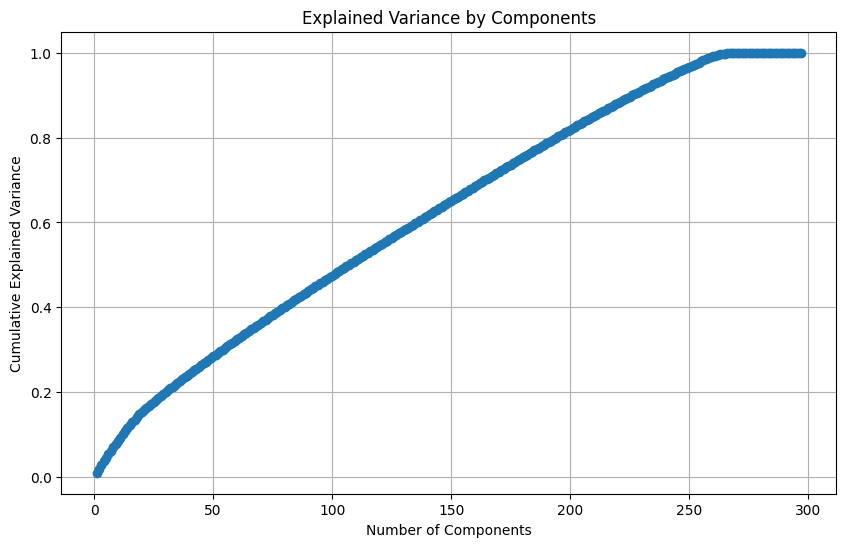

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

pca = PCA()
pca.fit(X_train_scaled)

# Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()
# Reducing data to 2 components
pca = PCA(n_components=2,random_state=42)
X_train_reduced = pca.fit_transform(X_train_scaled)

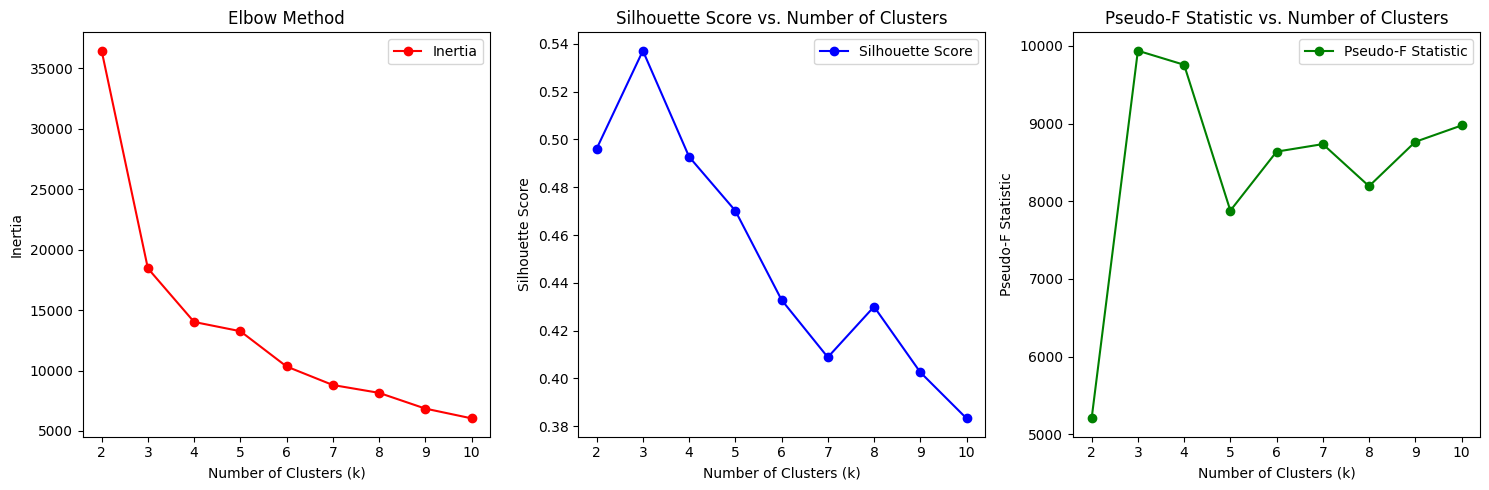

Optimal k based on Elbow Method: 3
Optimal k based on Pseudo-F Statistic: 3
Optimal k based on Silhouette Score: 3
Silhouette Score for optimal k (3): 0.5371510752851625
Pseudo-F Statistic for optimal k (3): 9937.131379447383
Final Optimal Number of Clusters (k): 3
Cluster Analysis for k=3:
              PC1       PC2
Cluster                    
0       -0.453339  3.331156
1        2.642637 -0.439000
2       -0.774723 -0.609624


In [ ]:
from sklearn.cluster import KMeans

# --- Define a function to compute the pseudo-F statistic ---
def pseudo_f_statistic(X, labels):
    # Calculate the overall mean
    overall_mean = np.mean(X, axis=0)

    # Calculate the between-cluster variance
    unique_labels = np.unique(labels)
    between_cluster_variance = sum(
        np.sum(labels == k) * np.sum((np.mean(X[labels == k], axis=0) - overall_mean) ** 2)
        for k in unique_labels
    )

    # Calculate the within-cluster variance
    within_cluster_variance = sum(
        np.sum((X[labels == k] - np.mean(X[labels == k], axis=0)) ** 2) for k in unique_labels
    )

    # Number of clusters and number of data points
    n_clusters = len(unique_labels)
    n_samples = X.shape[0]

    # Compute the pseudo-F statistic
    pseudo_f = (between_cluster_variance / (n_clusters - 1)) / (within_cluster_variance / (n_samples - n_clusters))
    return pseudo_f

# --- K-means Clustering ---
k_values = range(2, 11)  # Range of k to test
inertia_values = []  # For Elbow Method
silhouette_scores = []  # For Silhouette Score
pseudo_f_stats = []  # For Pseudo-F Statistic

# Loop through different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train_reduced)

    # Calculate inertia (sum of squared distances to centroids)
    inertia_values.append(kmeans.inertia_)

    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(X_train_reduced, labels))

    # Calculate pseudo-F statistic
    pseudo_f_stats.append(pseudo_f_statistic(X_train_reduced, labels))

# --- Plot Elbow Method, Silhouette Scores, and Pseudo-F Statistics ---
plt.figure(figsize=(15, 5))

# Elbow Method
plt.subplot(1, 3, 1)
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='red', label='Inertia')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.legend()

# Silhouette Scores
plt.subplot(1, 3, 2)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='blue', label='Silhouette Score')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.legend()

# Pseudo-F Statistics
plt.subplot(1, 3, 3)
plt.plot(k_values, pseudo_f_stats, marker='o', linestyle='-', color='green', label='Pseudo-F Statistic')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Pseudo-F Statistic")
plt.title("Pseudo-F Statistic vs. Number of Clusters")
plt.legend()

plt.tight_layout()
plt.show()

# --- Optimal K Selection ---
optimal_k_elbow = k_values[np.argmin(np.diff(inertia_values)) + 1]  # Identify "elbow" point
optimal_k_pseudo_f = k_values[np.argmax(pseudo_f_stats)]  # Maximize pseudo-F
optimal_k_silhouette = k_values[np.argmax(silhouette_scores)]  # Maximize silhouette score

print(f"Optimal k based on Elbow Method: {optimal_k_elbow}")
print(f"Optimal k based on Pseudo-F Statistic: {optimal_k_pseudo_f}")
print(f"Optimal k based on Silhouette Score: {optimal_k_silhouette}")

# --- Print the Silhouette Score and Pseudo-F Statistic for the optimal k ---
print(f"Silhouette Score for optimal k ({optimal_k_silhouette}): {silhouette_scores[k_values.index(optimal_k_silhouette)]}")
print(f"Pseudo-F Statistic for optimal k ({optimal_k_pseudo_f}): {pseudo_f_stats[k_values.index(optimal_k_pseudo_f)]}")

# --- Final K-means Model with Optimal k ---
# Choosing the most consistent result across metrics (pseudo-F prioritized here)
final_optimal_k = optimal_k_pseudo_f
kmeans_final = KMeans(n_clusters=final_optimal_k, random_state=42)
final_labels = kmeans_final.fit_predict(X_train_reduced)

# Add cluster labels to the PCA-reduced data
X_train_reduced_with_clusters = pd.DataFrame(X_train_reduced, columns=[f"PC{i+1}" for i in range(X_train_reduced.shape[1])])
X_train_reduced_with_clusters['Cluster'] = final_labels

# --- Analyze the clusters ---
cluster_analysis = X_train_reduced_with_clusters.groupby('Cluster').mean()

print(f"Final Optimal Number of Clusters (k): {final_optimal_k}")
print(f"Cluster Analysis for k={final_optimal_k}:")
print(cluster_analysis)


Try different numbers of components and turned out 2 components is the best choice.

In [ ]:
# Iterate through different numbers of components for PCA
n_components_values = [2,3,4,5]
for n_components in n_components_values:  # Try components from 2 to 5
  pca = PCA(n_components=n_components, random_state=5)
  X_train_reduced_test = pca.fit_transform(X_train_scaled)

  # Apply KMeans clustering
  kmeans = KMeans(n_clusters=3, random_state=5)
  kmeans.fit(X_train_reduced_test)
  cluster_labels = kmeans.labels_

  # Calculate silhouette score
  silhouette_avg = silhouette_score(X_train_reduced_test, cluster_labels)
  print(f"Silhouette score for PCA with {n_components} components: {silhouette_avg}")

Silhouette score for PCA with 2 components: 0.5372359150248456
Silhouette score for PCA with 3 components: 0.40168513520857696
Silhouette score for PCA with 4 components: 0.3349712350232499
Silhouette score for PCA with 5 components: 0.2602062203562919


Clustering results

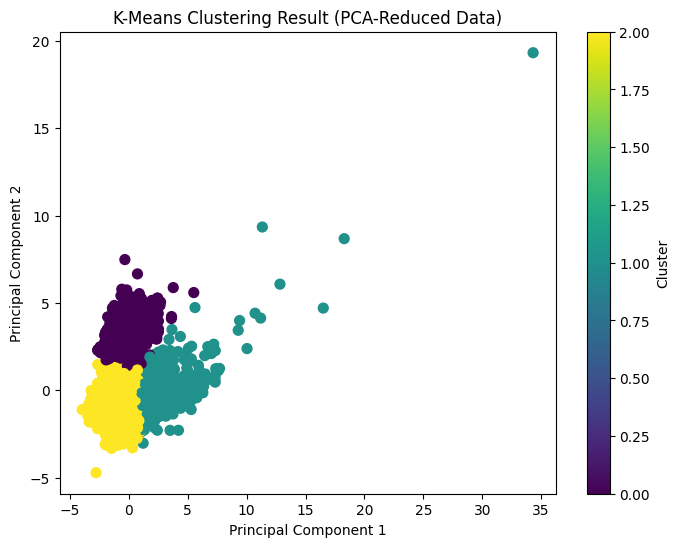

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=final_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering Result (PCA-Reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
# Add cluster labels to the original dataset
X_train_with_clusters = pd.DataFrame(X_train_scaled, columns=X_train.columns)  # Replace with your scaled feature names
X_train_with_clusters['Cluster'] = final_labels

# Analyze the characteristics of each cluster
cluster_summary_transposed = X_train_with_clusters.groupby('Cluster').mean().T  # Transpose the table for clarity

# Print the transposed cluster summary
print("\nCluster Summary Table (Transposed):")
print(cluster_summary_transposed.to_string(index=True))  # Ensures full table prints without truncation



Cluster Summary Table (Transposed):
Cluster                            0         1         2
goal                        0.000250 -0.016285  0.005351
pledged                    -0.020927  0.247719 -0.077513
staff_pick                  0.097289  0.267475 -0.110881
backers_count               0.022342  0.320904 -0.111627
usd_pledged                 0.001152  0.303204 -0.100945
name_len_clean              0.030677  0.120608 -0.047006
blurb_len_clean            -0.012838  0.019198 -0.003464
show_feature_image          0.036582  0.120009 -0.048146
video                       0.030596  0.182031 -0.067384
project_length_days        -0.094863 -0.161916  0.075278
country_1                  -0.014265 -0.014265  0.007972
country_2                  -0.010087 -0.010087  0.005637
country_3                   0.000000  0.000000  0.000000
country_4                  -0.017472 -0.017472  0.009764
country_5                  -0.057149  0.035071  0.001314
country_6                   0.044098 -0.009610 -0.0

Cluster 0:
Cluster 0 represents moderately successful projects with balanced characteristics. Financial support (pledged, backers_count, usd_pledged) is slightly below average, indicating projects that performed reasonably well but lacked standout success. Marketing-related features like staff_pick and video are mildly positive, suggesting some level of promotion but not as aggressive as Cluster 1. Projects in this cluster tend to have slightly shorter durations compared to average, making them more concise yet effective.

Cluster 1:
Cluster 1 includes highly successful projects with strong financial backing and backer engagement. Key features like pledged, backers_count, and usd_pledged show high positive values, signifying well-supported projects. These projects are heavily promoted, as reflected by the high values for staff_pick and video, indicating curated content and effective marketing strategies. Additionally, projects in this cluster are characterized by shorter-than-average durations, potentially reflecting efficiency and well-defined goals.

Cluster 2:
Cluster 2 contains underperforming projects with low financial outcomes and minimal engagement. Features like pledged, backers_count, and usd_pledged are strongly negative, highlighting the lack of support. Marketing-related features such as staff_pick and video also show negative values, suggesting minimal promotion or visibility. These projects tend to have longer durations, which may indicate less focus or a failure to capture attention within a reasonable timeframe.

Summary of Clusters:

Cluster 0: Moderate projects with average characteristics.
Cluster 1: Highly successful projects, well-promoted, with strong financial support and shorter durations.
Cluster 2: Underperforming projects, less promoted, with lower backer engagement and longer durations.

<ipython-input-38-67adc122eb48>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_with_clusters, palette="Set2")


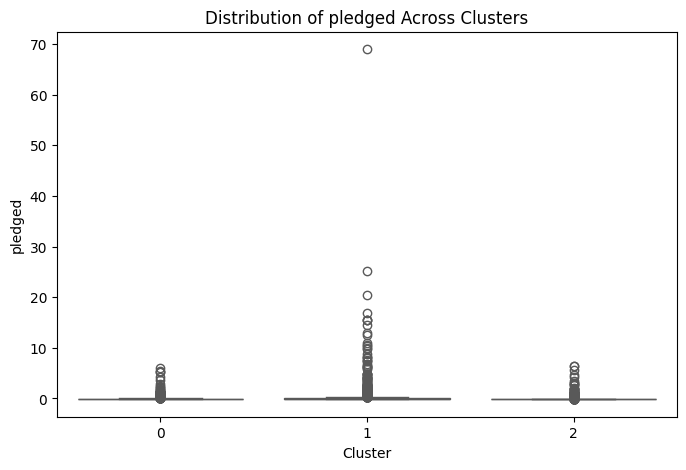

<ipython-input-38-67adc122eb48>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_with_clusters, palette="Set2")


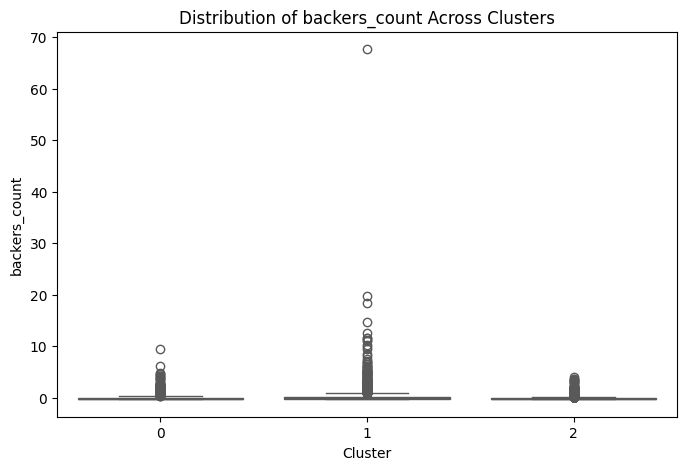

<ipython-input-38-67adc122eb48>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_with_clusters, palette="Set2")


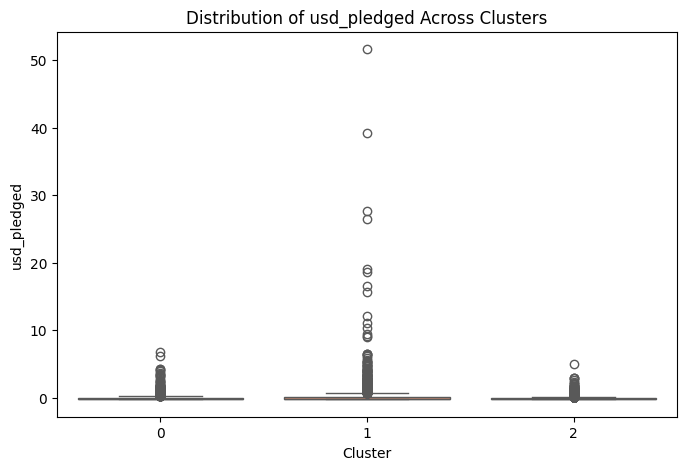

<ipython-input-38-67adc122eb48>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_with_clusters, palette="Set2")


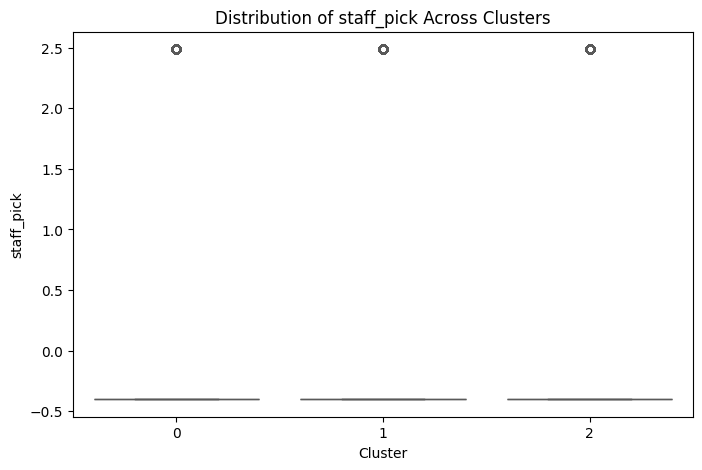

<ipython-input-38-67adc122eb48>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_with_clusters, palette="Set2")


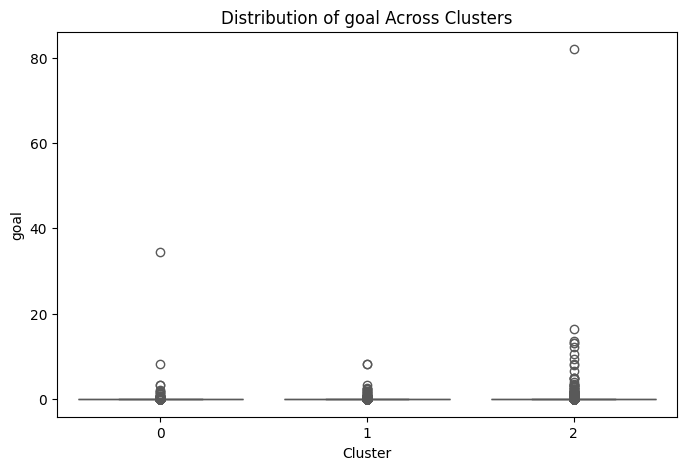

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Key features to visualize
key_features = ['pledged', 'backers_count', 'usd_pledged', 'staff_pick','goal']

# Plot boxplots for each key feature
for feature in key_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Cluster', y=feature, data=X_train_with_clusters, palette="Set2")
    plt.title(f'Distribution of {feature} Across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()


3. Density-based clustering

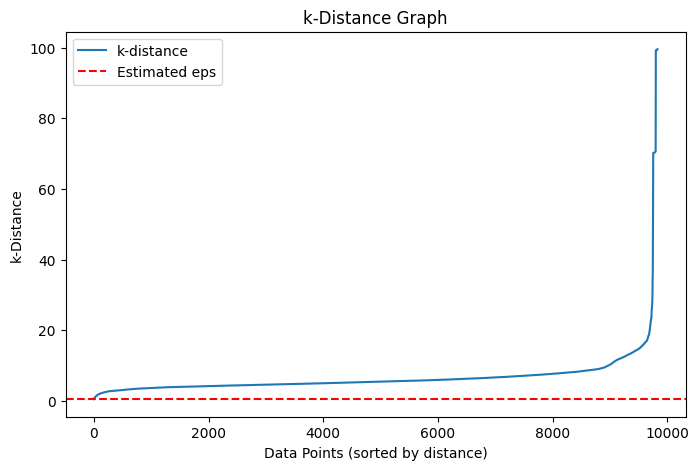

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# --- Determine the optimal value of epsilon (eps) using the k-distance plot ---
# NearestNeighbors for calculating k-distances
k = 3
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(X_train_scaled)
distances, indices = neighbors.kneighbors(X_train_scaled)

# Sort the distances for k-distance plot
distances = np.sort(distances[:, k-1], axis=0)

# Plot the k-distance graph
plt.figure(figsize=(8, 5))
plt.plot(distances, label='k-distance')
plt.axhline(y=0.5, color='r', linestyle='--', label='Estimated eps')
plt.title("k-Distance Graph")
plt.xlabel("Data Points (sorted by distance)")
plt.ylabel("k-Distance")
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

# Assuming your scaled data is in X_train_scaled

# Define the range of eps and min_samples values
eps_values = [5, 10, 15, 20, 25]
min_samples_values = [3, 5, 7, 10]

best_silhouette = -1  # Initializing best silhouette score
best_eps = None
best_min_samples = None

# Loop through different eps and min_samples values
for eps in eps_values:
    for min_samples in min_samples_values:
        # Run DBSCAN with the current eps and min_samples values
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_train_scaled)

        # Check if there are any clusters, excluding noise points (-1)
        unique_labels = set(dbscan_labels)

        if len(unique_labels) > 1:
            try:
                # Calculate the silhouette score, considering noise points
                silhouette_avg = silhouette_score(X_train_scaled, dbscan_labels)

                # Print the combination and its silhouette score
                print(f"eps: {eps}, min_samples: {min_samples}, Silhouette Score: {silhouette_avg:.4f}")

                # If this silhouette score is better than the previous ones, update best values
                if silhouette_avg > best_silhouette:
                    best_silhouette = silhouette_avg
                    best_eps = eps
                    best_min_samples = min_samples
            except ValueError:
                # In case silhouette score cannot be computed (e.g., not enough clusters)
                print(f"Silhouette Score cannot be computed for eps: {eps}, min_samples: {min_samples}")

# Output the best eps, min_samples, and silhouette score
print(f"\nBest eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best Silhouette Score: {best_silhouette:.4f}")


eps: 5, min_samples: 3, Silhouette Score: -0.1856
eps: 5, min_samples: 5, Silhouette Score: -0.2248
eps: 5, min_samples: 7, Silhouette Score: -0.2519
eps: 5, min_samples: 10, Silhouette Score: -0.2594
eps: 10, min_samples: 3, Silhouette Score: 0.2285
eps: 10, min_samples: 5, Silhouette Score: 0.2292
eps: 10, min_samples: 7, Silhouette Score: 0.2298
eps: 10, min_samples: 10, Silhouette Score: 0.2261
eps: 15, min_samples: 3, Silhouette Score: 0.2082
eps: 15, min_samples: 5, Silhouette Score: 0.2029
eps: 15, min_samples: 7, Silhouette Score: 0.2006
eps: 15, min_samples: 10, Silhouette Score: 0.1920
eps: 20, min_samples: 3, Silhouette Score: 0.2808
eps: 20, min_samples: 5, Silhouette Score: 0.2757
eps: 20, min_samples: 7, Silhouette Score: 0.2711
eps: 20, min_samples: 10, Silhouette Score: 0.2615
eps: 25, min_samples: 3, Silhouette Score: 0.3668
eps: 25, min_samples: 5, Silhouette Score: 0.3612
eps: 25, min_samples: 7, Silhouette Score: 0.3560
eps: 25, min_samples: 10, Silhouette Score: 0.